# Легенда

Вы продолжаете работу над мобильной игрой Quiz Freeze.

Коллеги вновь обратились к вам за помощью. На сей раз вам необходимо проверить несколько гипотез.

Вот список вопросов, который вы составили после встречи с командой.

**Гипотеза 1**
 
- По идее, должна быть разница в поведении групп, которые проходят и не проходят обучение. Но так ли это? Влияет ли обучение на скорость прохождения других этапов игры?

**Гипотеза 2**

- Кажется, повторное прохождение обучения положительно влияет на оплату, верно?

**Гипотеза 3** 

- Если пользователь сначала выбирает сложность обучения, будет ли он потом проходить обучение?



**ЦЕЛЬ**

Исследовать поведение пользователей в обновлённом приложении.

**ЗАДАЧИ**

- 1.Определить, насколько обучение сокращает время прохождения этапов игры.

- 2.Доказать, что успешное обучение само по себе влияет на оплату и не имеет значения то, каким этапом оно шло.

- 3.Определить, насколько прозрачен процесс взаимодействия с игрой.

**КОНКРЕТНЫЕ ШАГИ (ФОРМАЛИЗОВАННЫЕ ЗАДАЧИ)**

- 1.Сравнить время прохождения различных этапов для пользователей, которые завершили обучение, и пользователей, не начинавших обучение. Если показатель отличается, выяснить, насколько.

- 2.Проверить, существует ли зависимость между вероятностью оплаты вопросов и количеством обучений, которые начинал или завершал пользователь. 

- 3.Выяснить, как часто пользователи начинают обучение после выбора уровня сложности. (Это позволит оценить прозрачность процесса взаимодействия с игрой: если пользователи после выбора уровня сложности обращаются к обучению, значит, работа с приложением непонятна.)




**ОПИСАНИЕ ДАННЫХ**

Таблица Event - хранит данные о событиях, которые совершают пользователи.

- `id` - идентификатор события;

- `user_id`	- уникальный идентификатор пользователя, совершившего событие в приложении;

- `start_time` - дата и время события;

- `event_type` - тип события (значения: registration — регистрация; tutorial_start — начало обучения; tutorial_finish — завершение обучения; level_choice — выбор уровня сложности; pack_choice — выбор пакетов вопросов);

- `tutorial_id` - идентификатор обучения (этот идентификатор есть только у событий обучения);

- `selected_level` - выбранный уровень сложности обучения.

Таблица purchase - хранит данные об оплатах, которые совершают пользователи.

- `id` - идентификатор события;

- `user_id` - уникальный идентификатор пользователя, совершившего событие в приложении;

- `event_datetime` - дата и время события/покупки;

- `amount` - сумма оплаты.


**Примечание:** исследования выполняются на основе данных пользователей, которые зарегистрировались в 2018 году (с 1 января по 31 декабря 2018 года включительно). 

**Обработка данных**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Events = pd.read_csv(r'D:\SF_data\38\Events.csv')
purchase = pd.read_csv(r'D:\SF_data\38\purchase.csv')

Events.head()

,id,event_type,selected_level,start_time,tutorial_id,user_id
0,28903,registration,NaN,2016-05-11T23:40:55,NaN,12583
1,28904,registration,NaN,2016-05-11T23:49:58,NaN,12584
2,28905,registration,NaN,2016-05-12T00:53:07,NaN,12585
3,28906,tutorial_start,NaN,2016-05-12T01:32:20,17562.0,12585
4,28907,tutorial_finish,NaN,2016-05-12T01:34:53,17562.0,12585


In [43]:
# выделяем список user_id зарегистрировавшихся в 2018 году
mask = ((Events['start_time'] >= '2018-01-01') & (Events['start_time'] < '2019-01-01')) & (Events['event_type'] == 'registration')
list_user_2018 = list(Events[mask]['user_id'])

#Создаем датафрейм из событий пользователей зарегистрировавшихся в 2018 году
Events_2018 = Events[Events['user_id'].isin(list_user_2018)]
Events_2018.head()

,id,event_type,selected_level,start_time,tutorial_id,user_id
51405,80308,registration,NaN,2018-01-01T03:48:40,NaN,27832
51406,80309,registration,NaN,2018-01-01T04:07:25,NaN,27833
51407,80310,registration,NaN,2018-01-01T08:35:10,NaN,27834
51408,80311,registration,NaN,2018-01-01T11:54:47,NaN,27835
51409,80312,registration,NaN,2018-01-01T13:28:07,NaN,27836


In [3]:
Events_2018['start_time'] = pd.to_datetime(Events_2018['start_time'], format='%Y-%m-%dT%H:%M:%S')

Events_2018.head()

C:\Users\Тимур\AppData\Local\Temp\ipykernel_14632\401666736.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Events_2018['start_time'] = pd.to_datetime(Events_2018['start_time'], format='%Y-%m-%dT%H:%M:%S')


,id,event_type,selected_level,start_time,tutorial_id,user_id
51405,80308,registration,NaN,2018-01-01 03:48:40,NaN,27832
51406,80309,registration,NaN,2018-01-01 04:07:25,NaN,27833
51407,80310,registration,NaN,2018-01-01 08:35:10,NaN,27834
51408,80311,registration,NaN,2018-01-01 11:54:47,NaN,27835
51409,80312,registration,NaN,2018-01-01 13:28:07,NaN,27836


In [4]:
purchase.head()

,id,user_id,event_datetime,amount
0,15674,12584,2016-05-12T10:34:16,100
1,15675,12985,2016-05-13T08:25:56,50
2,15676,12828,2016-05-13T16:33:46,50
3,15677,12598,2016-05-14T01:09:37,150
4,15678,13037,2016-05-14T01:24:46,100


In [44]:
# Создаем таблиц оплат совершенных пользователями зарегистрировавшихся в 2018 году
purchase_2018 = purchase[purchase['user_id'].isin(list_user_2018)]
purchase_2018['event_datetime'] = pd.to_datetime(purchase_2018['event_datetime'],format='%Y-%m-%dT%H:%M:%S')
purchase_2018.head()

C:\Users\Тимур\AppData\Local\Temp\ipykernel_14632\1597167327.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  purchase_2018['event_datetime'] = pd.to_datetime(purchase_2018['event_datetime'],format='%Y-%m-%dT%H:%M:%S')


,id,user_id,event_datetime,amount
1171,16845,27845,2018-01-03 18:53:43,100
1172,16846,27865,2018-01-04 14:46:10,250
1174,16848,27911,2018-01-07 08:19:12,50
1175,16849,27910,2018-01-07 12:11:34,100
1176,16850,27940,2018-01-07 13:16:41,200


**1.Проверка 1-ой гипотезы**

Формирование Датафрейма только из пользователей, закончивших обучение.

In [6]:
list_tutorial_finish = Events_2018[Events_2018['event_type'] == 'tutorial_finish']['user_id'].unique()

Events_finish_tutorial = Events_2018[Events_2018['user_id'].isin(list_tutorial_finish)]

Events_finish_tutorial.head()

,id,event_type,selected_level,start_time,tutorial_id,user_id
51406,80309,registration,NaN,2018-01-01 04:07:25,NaN,27833
51407,80310,registration,NaN,2018-01-01 08:35:10,NaN,27834
51408,80311,registration,NaN,2018-01-01 11:54:47,NaN,27835
51409,80312,registration,NaN,2018-01-01 13:28:07,NaN,27836
51412,80315,tutorial_start,NaN,2018-01-01 14:54:40,31505.0,27836


Формирование датафрейма из пользователей, не начавших обучение.
Алгоритм следующий: создаем множество из всех пользователей и множество из пользователей, начавших обучение. Затем производим операцию вычитания двух множеств. Таким образом, получим пользователей, не начавших обучение.

In [7]:
list_tutorial_start = Events_2018[Events_2018['event_type'] == 'tutorial_start']['user_id'].unique()

list_tutorial_start = set(list_tutorial_start)
list_all_user = Events_2018['user_id'].unique()
list_all_user = set(list_all_user)
list_not_tutorial_start = list_all_user.difference(list_tutorial_start)

Events_no_tutorial = Events_2018[Events_2018['user_id'].isin(list_not_tutorial_start)]

Events_no_tutorial.head()


,id,event_type,selected_level,start_time,tutorial_id,user_id
51405,80308,registration,NaN,2018-01-01 03:48:40,NaN,27832
51410,80313,registration,NaN,2018-01-01 14:08:40,NaN,27837
51411,80314,registration,NaN,2018-01-01 14:42:58,NaN,27838
51432,80335,registration,NaN,2018-01-02 00:13:22,NaN,27844
51442,80345,registration,NaN,2018-01-02 06:05:02,NaN,27848


In [8]:
Events_no_tutorial_registration = Events_no_tutorial[Events_no_tutorial['event_type'] == 'registration']
Events_no_tutorial_level_choice = Events_no_tutorial[Events_no_tutorial['event_type'] == 'level_choice']
Events_no_tutorial_pack_choice = Events_no_tutorial[Events_no_tutorial['event_type'] == 'pack_choice']

Events_finish_tutorial_registration = Events_finish_tutorial[Events_finish_tutorial['event_type'] == 'registration']
Events_finish_tutorial_level_choice = Events_finish_tutorial[Events_finish_tutorial['event_type'] == 'level_choice']
Events_finish_tutorial_pack_choice = Events_finish_tutorial[Events_finish_tutorial['event_type'] == 'pack_choice']



In [9]:
Events_no_tutorial_registration = Events_no_tutorial_registration[['user_id','start_time']]
Events_no_tutorial_registration = Events_no_tutorial_registration.rename(columns={"start_time": "registration_time"})

Events_no_tutorial_level_choice = Events_no_tutorial_level_choice[['user_id','start_time']]
Events_no_tutorial_level_choice = Events_no_tutorial_level_choice.rename(columns={"start_time": "level_choice_time"})

Events_no_tutorial_pack_choice = Events_no_tutorial_pack_choice[['user_id','start_time']]
Events_no_tutorial_pack_choice = Events_no_tutorial_pack_choice.rename(columns={"start_time": "pack_choice_time"})

Events_finish_tutorial_registration = Events_finish_tutorial_registration[['user_id','start_time']]
Events_finish_tutorial_registration = Events_finish_tutorial_registration.rename(columns={"start_time": "registration_time"})

Events_finish_tutorial_level_choice = Events_finish_tutorial_level_choice[['user_id','start_time']]
Events_finish_tutorial_level_choice = Events_finish_tutorial_level_choice.rename(columns={"start_time": "level_choice_time"})

Events_finish_tutorial_pack_choice = Events_finish_tutorial_pack_choice[['user_id','start_time']]
Events_finish_tutorial_pack_choice = Events_finish_tutorial_pack_choice.rename(columns={"start_time": "pack_choice_time"})

In [10]:
Events_no_tutorial_pack_choice.head()

,user_id,pack_choice_time
51998,28033,2018-01-08 17:11:52
52380,28145,2018-01-11 00:12:15
54839,28865,2018-01-23 14:28:33
55104,28928,2018-01-24 14:06:56
55464,29066,2018-01-26 08:40:14


In [11]:
# Пользователи, которые закончили обучение и совершили оплату.
purchase_2018_finish_tutorial = purchase_2018[purchase_2018['user_id'].isin(list_tutorial_finish)]
purchase_2018_finish_tutorial.head()

,id,user_id,event_datetime,amount
1171,16845,27845,2018-01-03 18:53:43,100
1175,16849,27910,2018-01-07 12:11:34,100
1176,16850,27940,2018-01-07 13:16:41,200
1178,16852,27981,2018-01-07 23:20:25,50
1179,16853,27969,2018-01-08 01:18:23,100


In [12]:
#Объединяем датафреймы для дальнейших вычислений.
merge_finish_tutorial_purchase_registration = Events_finish_tutorial_registration.merge(purchase_2018_finish_tutorial, on='user_id', how='inner')
merge_finish_tutorial_purchase_level_choice = Events_finish_tutorial_level_choice.merge(purchase_2018_finish_tutorial, on='user_id', how='inner')
merge_finish_tutorial_purchase_pack_choice = Events_finish_tutorial_pack_choice.merge(purchase_2018_finish_tutorial, on='user_id', how='inner')



Формирование Датафрейма только из пользователей закончивших обучение.

In [13]:
merge_finish_tutorial_purchase_registration['timedelta'] = merge_finish_tutorial_purchase_registration['event_datetime'] - merge_finish_tutorial_purchase_registration['registration_time']
merge_finish_tutorial_purchase_registration['timedelta'] = (merge_finish_tutorial_purchase_registration['timedelta']/np.timedelta64(1,'h'))

merge_finish_tutorial_purchase_level_choice['timedelta'] = merge_finish_tutorial_purchase_level_choice['event_datetime'] - merge_finish_tutorial_purchase_level_choice['level_choice_time'] 
merge_finish_tutorial_purchase_level_choice['timedelta'] = (merge_finish_tutorial_purchase_level_choice['timedelta']/np.timedelta64(1,'h'))

merge_finish_tutorial_purchase_pack_choice['timedelta'] = merge_finish_tutorial_purchase_pack_choice['event_datetime'] - merge_finish_tutorial_purchase_pack_choice['pack_choice_time'] 
merge_finish_tutorial_purchase_pack_choice['timedelta'] = (merge_finish_tutorial_purchase_pack_choice['timedelta']/np.timedelta64(1,'h'))

In [14]:
# Пользователи, котороые не начали обучение и совершили оплату.
purchase_2018_no_tutorial = purchase_2018[purchase_2018['user_id'].isin(list_not_tutorial_start)]

purchase_2018_no_tutorial.head()

,id,user_id,event_datetime,amount
1200,16874,28033,2018-01-16 05:08:41,100
1276,16950,28928,2018-01-29 14:47:12,200
1458,17132,31161,2018-03-09 14:10:27,100
1602,17276,32975,2018-04-01 08:53:29,150
1626,17300,33253,2018-04-06 03:49:04,100


In [15]:
#Объединяем датафреймы для дальнейших вычислений.
merge_no_tutorial_purchase_registration = Events_no_tutorial_registration.merge(purchase_2018_no_tutorial, on='user_id', how='inner')
merge_no_tutorial_purchase_level_choice = Events_no_tutorial_level_choice.merge(purchase_2018_no_tutorial, on='user_id', how='inner')
merge_no_tutorial_purchase_pack_choice = Events_no_tutorial_pack_choice.merge(purchase_2018_no_tutorial, on='user_id', how='inner')


In [16]:
merge_no_tutorial_purchase_registration['timedelta'] = merge_no_tutorial_purchase_registration['event_datetime'] - merge_no_tutorial_purchase_registration['registration_time']
merge_no_tutorial_purchase_registration['timedelta'] = (merge_no_tutorial_purchase_registration['timedelta']/ np.timedelta64(1,'h'))

merge_no_tutorial_purchase_level_choice['timedelta'] = merge_no_tutorial_purchase_level_choice['event_datetime'] - merge_no_tutorial_purchase_level_choice['level_choice_time']
merge_no_tutorial_purchase_level_choice['timedelta'] = (merge_no_tutorial_purchase_level_choice['timedelta']/ np.timedelta64(1,'h'))

merge_no_tutorial_purchase_pack_choice['timedelta'] = merge_no_tutorial_purchase_pack_choice['event_datetime'] - merge_no_tutorial_purchase_pack_choice['pack_choice_time']
merge_no_tutorial_purchase_pack_choice['timedelta'] = (merge_no_tutorial_purchase_pack_choice['timedelta']/ np.timedelta64(1,'h'))


Строим графики для сравнения среднего времени между категориями пользователей.

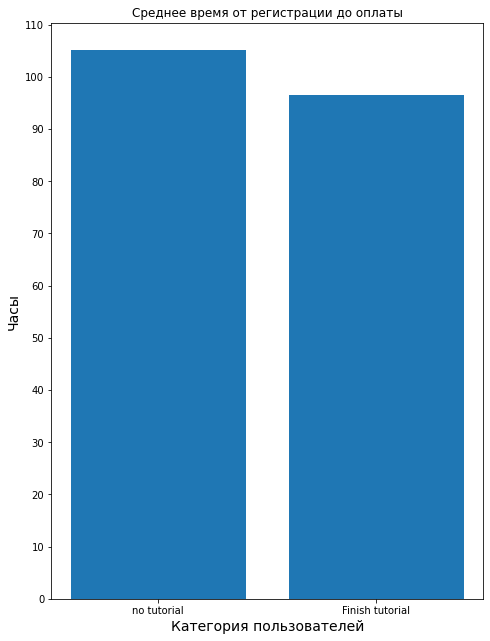

In [17]:
x_data = ['no tutorial','Finish tutorial']
y_data_registration = [merge_no_tutorial_purchase_registration['timedelta'].mean(), merge_finish_tutorial_purchase_registration['timedelta'].mean()]
y_data_level_choice = [merge_no_tutorial_purchase_level_choice['timedelta'].mean(), merge_finish_tutorial_purchase_level_choice['timedelta'].mean()]
y_data_pack_choice = [merge_no_tutorial_purchase_pack_choice['timedelta'].mean(), merge_finish_tutorial_purchase_pack_choice['timedelta'].mean()]

fig1 = plt.figure(figsize=(6,8))
ax1 = fig1.add_axes([0,0,1,1])

ax1.bar(x_data, y_data_registration)
ax1.set_title("Среднее время от регистрации до оплаты", loc='center')
ax1.set_xlabel('Категория пользователей',fontsize=14)
ax1.set_ylabel('Часы',fontsize=14)
ax1.set_yticks(np.arange(0, 120, 10))


plt.show()

In [18]:
percent_registration = (merge_no_tutorial_purchase_registration['timedelta'].mean() - merge_finish_tutorial_purchase_registration['timedelta'].mean())/merge_no_tutorial_purchase_registration['timedelta'].mean()
percent_registration = round(percent_registration*100, 2)
print(f'разница во времени между регистрацией и оплатой составляет {percent_registration}%')

разница во времени между регистрацией и оплатой составляет 8.18%


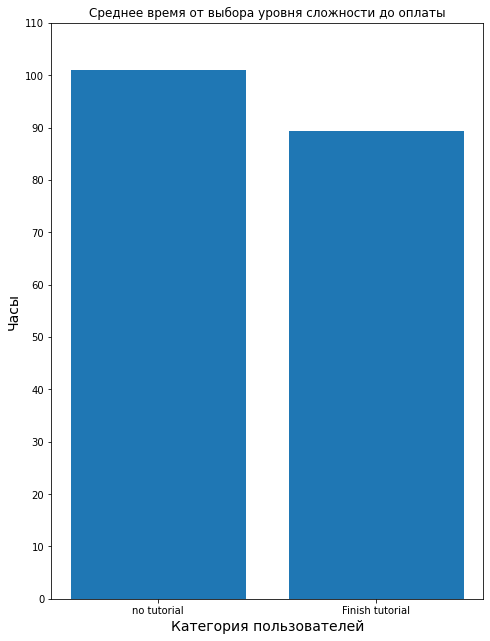

In [19]:

fig2 = plt.figure(figsize=(6,8))
ax2 = fig2.add_axes([0,0,1,1])


ax2.bar(x_data, y_data_level_choice)
ax2.set_title("Среднее время от выбора уровня сложности до оплаты", loc='center')
ax2.set_xlabel('Категория пользователей',fontsize=14)
ax2.set_ylabel('Часы',fontsize=14)
ax2.set_yticks(np.arange(0, 120, 10))

plt.show()

In [20]:
percent_level_choice = (merge_no_tutorial_purchase_level_choice['timedelta'].mean() - merge_finish_tutorial_purchase_level_choice['timedelta'].mean())/merge_no_tutorial_purchase_level_choice['timedelta'].mean()
percent_level_choice = round(percent_level_choice*100, 2)
print(f'разница во времени между выбором уровня сложности и оплатой составляет {percent_level_choice}%')

разница во времени между выбором уровня сложности и оплатой составляет 11.42%


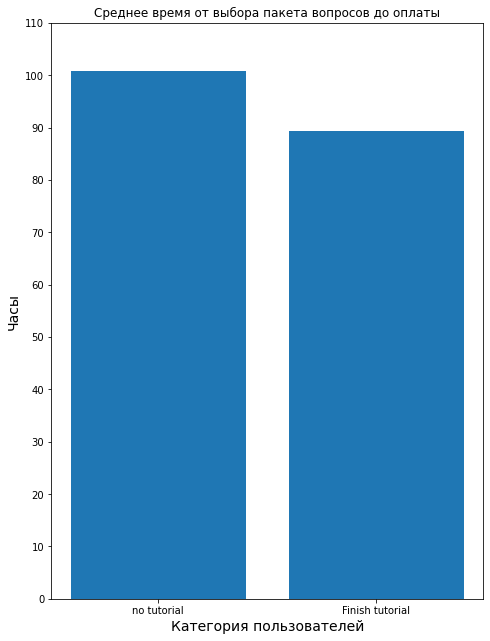

In [21]:

fig3 = plt.figure(figsize=(6,8))
ax3 = fig3.add_axes([0,0,1,1])

ax3.bar(x_data, y_data_pack_choice)
ax3.set_title("Среднее время от выбора пакета вопросов до оплаты", loc='center')
ax3.set_xlabel('Категория пользователей',fontsize=14)
ax3.set_ylabel('Часы',fontsize=14)
ax3.set_yticks(np.arange(0, 120, 10))

plt.show()

In [22]:
percent_pack_choice = (merge_no_tutorial_purchase_pack_choice['timedelta'].mean() - merge_finish_tutorial_purchase_pack_choice['timedelta'].mean())/merge_no_tutorial_purchase_pack_choice['timedelta'].mean()
percent_pack_choice = round(percent_pack_choice*100, 2)
print(f'разница во времени между выбором пакетов вопросов и оплатой составляет {percent_pack_choice}%')

разница во времени между выбором пакетов вопросов и оплатой составляет 11.43%


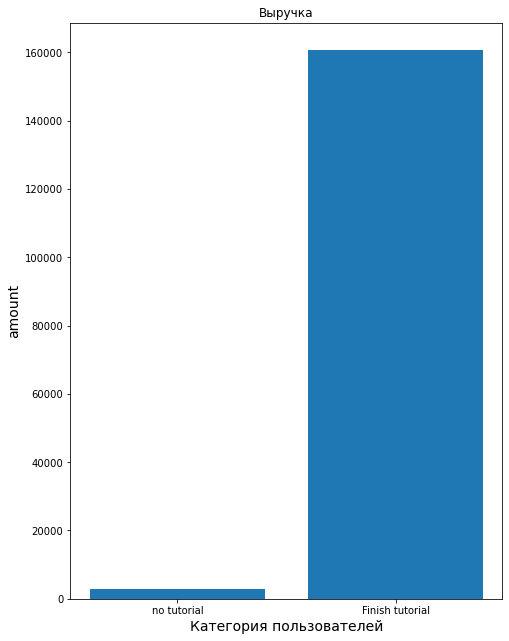

In [23]:
profit = [purchase_2018_no_tutorial['amount'].sum(), purchase_2018_finish_tutorial['amount'].sum()]

fig4 = plt.figure(figsize=(6,8))
ax4 = fig4.add_axes([0,0,1,1])

ax4.bar(x_data, profit)
ax4.set_title("Выручка", loc='center')
ax4.set_xlabel('Категория пользователей',fontsize=14)
ax4.set_ylabel('amount',fontsize=14)

plt.show()

**Вывод: разница во времени относительно пользователей, закончивших обучение и не начавших обучение, присутствует. В работе рассматривалось среднее время между событием и оплатой.**

**разница во времени между регистрацией и оплатой составляет 8.18%**

**разница во времени между регистрацией и оплатой составляет 11.42%**

**разница во времени между выбором пакетов вопросов и оплатой составляет 11.43%**

**Итого можно сказать, что обучение влияет на скорость прохождения этапов. Но если мы посмотрим на выручку от групп пользователей, то мы увидим колоссальную разницу. Факт прохождения обучения очень многое значит для мобильной игры!**

**2. Проверка 2-ой гипотезы**

In [24]:
Events_tutorial_start = Events_2018[Events_2018['event_type'] == 'tutorial_start']

Events_tutorial_start.head()

,id,event_type,selected_level,start_time,tutorial_id,user_id
51412,80315,tutorial_start,NaN,2018-01-01 14:54:40,31505.0,27836
51413,80316,tutorial_start,NaN,2018-01-01 15:00:51,31506.0,27835
51415,80318,tutorial_start,NaN,2018-01-01 15:40:43,31507.0,27836
51417,80320,tutorial_start,NaN,2018-01-01 17:47:40,31508.0,27833
51420,80323,tutorial_start,NaN,2018-01-01 19:11:36,31509.0,27839


In [25]:
# Делаем группировку по пользователям и получаем Датафрейм, в котором указано, сколько пользователей начинали обучение.
quantity_user_tutorial_start = Events_tutorial_start.groupby('user_id').count()

quantity_user_tutorial_start.head(20)

,id,event_type,selected_level,start_time,tutorial_id
user_id,,,,,
27833,1,1,0,1,1
27834,1,1,0,1,1
27835,1,1,0,1,1
27836,2,2,0,2,2
27839,1,1,0,1,1
27840,1,1,0,1,1
27841,1,1,0,1,1
27842,3,3,0,3,3
27843,1,1,0,1,1


In [26]:
quantity_user_tutorial_start = quantity_user_tutorial_start[['id','start_time']]
quantity_user_tutorial_start = quantity_user_tutorial_start.rename(columns={'id':'count_tutorial_start'})

quantity_user_tutorial_start.head()

,count_tutorial_start,start_time
user_id,,
27833,1,1
27834,1,1
27835,1,1
27836,2,2
27839,1,1


In [27]:
# Группируем еще раз датафрейм по количеству начатых обучений. Получаем датафрейм из количества начатых обучений, и сколько раз они были начаты.
quantity_tutorial_start = quantity_user_tutorial_start.groupby('count_tutorial_start').count()
quantity_tutorial_start = quantity_tutorial_start.rename(columns={'start_time':'count_user_tutorial_start'})
quantity_tutorial_start.head(10)

,count_user_tutorial_start
count_tutorial_start,
1,9103
2,1589
3,427
4,221
5,109
6,116
7,94
8,86
9,113


In [28]:
purchase_2018

,id,user_id,event_datetime,amount
1171,16845,27845,2018-01-03 18:53:43,100
1172,16846,27865,2018-01-04 14:46:10,250
1174,16848,27911,2018-01-07 08:19:12,50
1175,16849,27910,2018-01-07 12:11:34,100
1176,16850,27940,2018-01-07 13:16:41,200
...,...,...,...,...
2767,18441,47498,2019-01-02 03:48:19,100
2768,18442,47647,2019-01-02 23:26:26,150
2769,18443,47554,2019-01-03 00:36:36,50
2774,18448,47742,2019-01-04 12:51:41,50


In [29]:
merge_df1 = purchase_2018.merge(quantity_user_tutorial_start,on='user_id')

merge_df1.head(10)

,id,user_id,event_datetime,amount,count_tutorial_start,start_time
0,16845,27845,2018-01-03 18:53:43,100,2,2
1,16846,27865,2018-01-04 14:46:10,250,1,1
2,16848,27911,2018-01-07 08:19:12,50,1,1
3,16849,27910,2018-01-07 12:11:34,100,1,1
4,16850,27940,2018-01-07 13:16:41,200,1,1
5,16851,27965,2018-01-07 22:55:33,100,1,1
6,16852,27981,2018-01-07 23:20:25,50,1,1
7,16853,27969,2018-01-08 01:18:23,100,1,1
8,16854,27884,2018-01-08 19:37:34,150,3,3
9,16855,27977,2018-01-09 14:09:18,25,1,1


In [30]:
#Получаем Датафрейм, в котором указано количество обучений и сколько раз начинали обучение пользователи, совершившие оплату.
quantity_tutorial_start_purchase = merge_df1.groupby('count_tutorial_start').count()
quantity_tutorial_start_purchase = quantity_tutorial_start_purchase[['id']]
quantity_tutorial_start_purchase = quantity_tutorial_start_purchase.rename(columns={'id':'count_purchase_tutorial_start'})
quantity_tutorial_start_purchase.head(10)

,count_purchase_tutorial_start
count_tutorial_start,
1,1207
2,218
3,51
4,30
5,16
6,14
7,12
8,13
9,17


In [31]:
df_found_conversion = quantity_tutorial_start.merge(quantity_tutorial_start_purchase, on='count_tutorial_start')

df_found_conversion.head(10)

,count_user_tutorial_start,count_purchase_tutorial_start
count_tutorial_start,,
1,9103,1207
2,1589,218
3,427,51
4,221,30
5,109,16
6,116,14
7,94,12
8,86,13
9,113,17


In [32]:
#Считаем конверсию
df_found_conversion['conversion'] = df_found_conversion['count_purchase_tutorial_start']/df_found_conversion['count_user_tutorial_start']

df_found_conversion.head(10)

,count_user_tutorial_start,count_purchase_tutorial_start,conversion
count_tutorial_start,,,
1,9103,1207,0.132594
2,1589,218,0.137193
3,427,51,0.119438
4,221,30,0.135747
5,109,16,0.146789
6,116,14,0.120690
7,94,12,0.127660
8,86,13,0.151163
9,113,17,0.150442


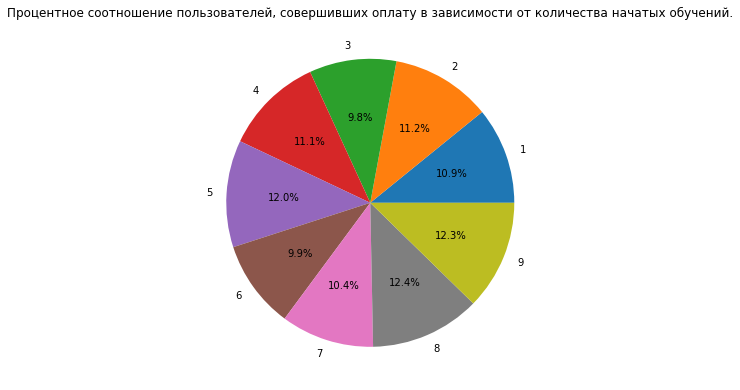

In [33]:
fig1 = plt.figure(figsize=(5, 5))
ax1 = fig1.add_axes([0, 0, 1, 1])

ax1.pie(
    df_found_conversion['conversion'],
    labels = df_found_conversion.index.values,
    autopct = '%1.1f%%'
)
ax1.set_title('Процентное соотношение пользователей, совершивших оплату в зависимости от количества начатых обучений.')
plt.show()

**Вывод: как видим из круговой диаграммы, процентное соотношение пользователей распределено практически равномерно. Расхождения в 2% скорее обусловлены из-за погрешностей расчетов. Из диаграммы получаем, что не важно каким образом и сколько раз пользователи прошли обучение. На совершение оплаты это не влияет.**

**3. Проверка гипотезы 3**

In [34]:
Events_level_choice = Events_2018[Events_2018['event_type'] == 'level_choice']
Events_level_choice = Events_level_choice.rename(columns={'start_time': 'level_choice_time'})
Events_level_choice.head()

,id,event_type,selected_level,level_choice_time,tutorial_id,user_id
51424,80327,level_choice,medium,2018-01-01 20:37:22,NaN,27835
51428,80331,level_choice,hard,2018-01-01 22:37:50,NaN,27839
51441,80344,level_choice,medium,2018-01-02 05:18:42,NaN,27840
51443,80346,level_choice,hard,2018-01-02 06:19:18,NaN,27845
51450,80353,level_choice,easy,2018-01-02 08:46:03,NaN,27842


Проверяем, мог ли 1 пользователь поменять уровень сложности. Если значение равно 1, значит 1 пользователь выбрал только 1 уровень. Если мы получили значение больше 1, то есть пользователи, которые выбирали уровень по несколько раз.

In [35]:
Events_level_choice['user_id'].value_counts().mean()

1.0

In [36]:
# считаем количество пользователей, выбравших уровень сложности вопросов.
count_all_users_level_choice = Events_level_choice['user_id'].nunique()

In [37]:

Events_tutorial_start = Events_tutorial_start.rename(columns={'start_time': 'tutorial_start_time'})

Events_tutorial_start.head()

,id,event_type,selected_level,tutorial_start_time,tutorial_id,user_id
51412,80315,tutorial_start,NaN,2018-01-01 14:54:40,31505.0,27836
51413,80316,tutorial_start,NaN,2018-01-01 15:00:51,31506.0,27835
51415,80318,tutorial_start,NaN,2018-01-01 15:40:43,31507.0,27836
51417,80320,tutorial_start,NaN,2018-01-01 17:47:40,31508.0,27833
51420,80323,tutorial_start,NaN,2018-01-01 19:11:36,31509.0,27839


In [38]:
#Объединяем Датафрейм для дальнейших вычислений
merged_df = Events_tutorial_start.merge(Events_level_choice, on='user_id', how='inner')
merged_df = merged_df[['user_id','tutorial_start_time', 'level_choice_time']]

merged_df.head(10)

,user_id,tutorial_start_time,level_choice_time
0,27835,2018-01-01 15:00:51,2018-01-01 20:37:22
1,27839,2018-01-01 19:11:36,2018-01-01 22:37:50
2,27840,2018-01-02 02:07:07,2018-01-02 05:18:42
3,27845,2018-01-02 03:03:44,2018-01-02 06:19:18
4,27845,2018-01-02 07:08:00,2018-01-02 06:19:18
5,27842,2018-01-02 04:55:11,2018-01-02 08:46:03
6,27842,2018-01-02 09:01:51,2018-01-02 08:46:03
7,27842,2018-01-02 18:08:01,2018-01-02 08:46:03
8,27849,2018-01-02 09:08:55,2018-01-02 11:53:11
9,27846,2018-01-02 09:22:22,2018-01-02 15:10:27


#Считаем разность во времени между выбором уровня и началом обучения. Если существует значение timedelta у пользователя отрицательное, то пользователь начинал прохождение обучения после выбора уровня сложности вопросов.

In [39]:
merged_df['timedelta'] = merged_df['level_choice_time'] - merged_df['tutorial_start_time']

merged_df.head(10)

,user_id,tutorial_start_time,level_choice_time,timedelta
0,27835,2018-01-01 15:00:51,2018-01-01 20:37:22,0 days 05:36:31
1,27839,2018-01-01 19:11:36,2018-01-01 22:37:50,0 days 03:26:14
2,27840,2018-01-02 02:07:07,2018-01-02 05:18:42,0 days 03:11:35
3,27845,2018-01-02 03:03:44,2018-01-02 06:19:18,0 days 03:15:34
4,27845,2018-01-02 07:08:00,2018-01-02 06:19:18,-1 days +23:11:18
5,27842,2018-01-02 04:55:11,2018-01-02 08:46:03,0 days 03:50:52
6,27842,2018-01-02 09:01:51,2018-01-02 08:46:03,-1 days +23:44:12
7,27842,2018-01-02 18:08:01,2018-01-02 08:46:03,-1 days +14:38:02
8,27849,2018-01-02 09:08:55,2018-01-02 11:53:11,0 days 02:44:16
9,27846,2018-01-02 09:22:22,2018-01-02 15:10:27,0 days 05:48:05


In [40]:
merged_df['timedelta'] = (merged_df['timedelta']/np.timedelta64('1','h'))
count_user_repeat_tutorial = merged_df[merged_df['timedelta'] < 0]['user_id'].nunique()

count_user_repeat_tutorial

1386

In [41]:
percent_repeat_tutorial = round((count_user_repeat_tutorial / count_all_users_level_choice) *100, 2)
print(f"{percent_repeat_tutorial}%")

16.61%


**Вывод: 16.61% пользователей от всех пользователей, выбравших уровень сложности вопросов, проходят повторное обучение.**
**Количество пользователей, выбравших уровень сложности, составляет 8342.**